# Table of Contents

1. Background
2. Variables
   - Activity level
   - Age
   - Alcohol consumption
   - BMI
3. Relationship between variables
4. References


# Background

The task of the project is to choose a real-world phenonmenon and to synthesise data relating to the phemonmenon whilst investigating the types of variables involved and the relationship of said variables.

The phenomenon I have chosen to investigate for this project is risk of a person developing type 2 diabetes in Ireland. The reasoning is that almost everyone in my family have been diagnosed with type 2 diabetes around the ages of 40-60. 
A person is diagnosed with type 2 diabetes if their blood glucose is above 200mg/dl. The number of adults with diabetes in Ireland has risen significantly over the past decades, from 93,871 people in 1980 to 253,812 people in 2014 (Lancet, 2017).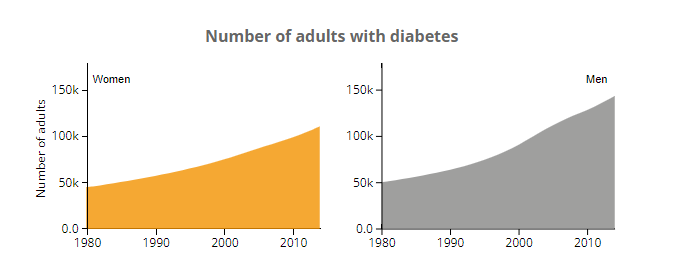 
The main factors that I will be examining is activity levels, the age of the person, their alcohol consumption and their body mass index.

Using python, I will simulate a dataset with 500 datapoints for the below 4 key variables and their distributions; 

1. Activity level, measured in minutes per week.

2. Age - measured in the person's age, with minimum age requirement of 18.

3. Alcohol consumption - whether the individual consumes alcohol.

4. Body Mass Index (BMI) - calculated by dividing the person's weight by height squared. 


# Variables

## Activity level

The World Health Organisation recommends that adults should partake in at least 60 minutes of moderate intensity physical activity per day to improve overall health and fitness. More active individuals have lower chances of developing diseases and have healthy body compositions which in turn prevents type 2 diabetes (World Health Organization, 2010). 

Unfortuately in the recent years, people are leaning towards a more sedentary lives. It was found that only 31.3% of 16+ years adults and 34% of 50+ years adults reached the recommened activity levels in Ireland (MRBI, 2014).


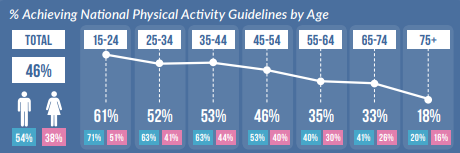

The above image by IPARC suggests that there is a negative correlation with age and activity level, however there are many different factors that affect activity level such as work/life balance, gender, every individual is different, therefore I will create random data using the normal distribution. Research by Aramark suggests that an average person get just 48 minutes of exercise per week.

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) 

# 0 hour for no exercise and 4.33 hours/420 minutes of exercise (the recommended amount), round result
activity_level = np.random.triangular(0,48,420,500).round()
print (activity_level)

# create dataframe using pandas to display data rather than a large array of random numbers.
df_actlvl = pd.DataFrame(activity_level, columns=["Activity level (mins per week)"])
                                                  
df_actlvl

[118. 211.   2.  90.  55.  43.  63. 100. 113. 152. 119. 198.  67. 282.
  23. 193. 118. 157.  54.  66. 244. 350.  92. 201. 281. 292.  41.  28.
  60. 282.  45. 119. 339. 150. 201.  93. 199. 259.  19. 222. 378. 222.
  85. 239.  46. 126. 300.  88.  86.  51.  20. 196.  69.  81. 138.  33.
 162.  55. 167. 203.  45. 117. 201. 117.  32. 151. 191. 145. 327. 166.
 297.  53.  53. 247. 113.  59. 314. 101. 223. 213. 285. 178. 223. 101.
  82. 292. 121. 346. 191. 177.  48. 331. 127. 163. 116.  75. 297. 162.
   8. 175.  96. 148. 287. 103. 300. 177.  18. 315. 200. 400.  60.  53.
 317. 202.  36. 225. 224. 310. 208.  50.  20.  23.  24.  77. 272. 152.
 156. 263.  50.  84. 166. 351. 158.  19. 244.  74. 246. 111. 274. 221.
 157.  53.  35.  49.  30.  47.  72. 208. 158.  16.  38. 348. 160.  67.
  78. 220.  65. 164. 352. 265.  75. 139. 176. 257.  57.  19.  38. 137.
 172. 160.  93. 378. 164. 109. 155. 221. 193.  81.  37. 106. 179.  69.
 223.  37.  80. 245.  65. 183. 147. 312.  81.  36. 217. 231. 300. 317.
  17. 

,Activity level (mins per week)
0,118.0
1,211.0
2,2.0
3,90.0
4,55.0
...,...
495,317.0
496,321.0
497,264.0
498,308.0


Assigning increasing risk level to activity level

- Sedentary: defined by 15 minutes or less of daily exercise/ 0-105 minutes will be assigned a risk level of very likely.
- Lightly active: defined by 1-2 hours of weekly exercise/ 106-120 minutes will be assigned a risk level of likely.
- Moderately active: defined by 3-5 hours of weekly exercise/ 121-300 minutes will be assigned a risk level of unlikely.
- Highly active: defined by 6-7 hours of weekly exercise/ 301-420 minutes will be assigned a risk level of very unlikely.


In [211]:
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# Assigning risk levels to the df of activity level above

# List of conditions for the actvity level
conditions = [
    (df_actlvl["Activity level (mins per week)"] <= 105),
    (df_actlvl["Activity level (mins per week)"] > 105) & (df_actlvl["Activity level (mins per week)"] <= 120),
    (df_actlvl["Activity level (mins per week)"] > 120) & (df_actlvl["Activity level (mins per week)"] <= 300),
    (df_actlvl["Activity level (mins per week)"] > 300) & (df_actlvl["Activity level (mins per week)"] <= 420)
    ]

values = ["Very Likely", "Likely", "Unlikely", "Very Unlikely"]

# Add column to the df with a heading
df_actlvl["Chance of developing diabetes"] = np.select(conditions, values)


df_actlvl

,Activity level (mins per week),Chance of developing diabetes
0,118.0,Likely
1,211.0,Unlikely
2,2.0,Very Likely
3,90.0,Very Likely
4,55.0,Very Likely
...,...,...
495,317.0,Very Unlikely
496,321.0,Very Unlikely
497,264.0,Unlikely
498,308.0,Very Unlikely


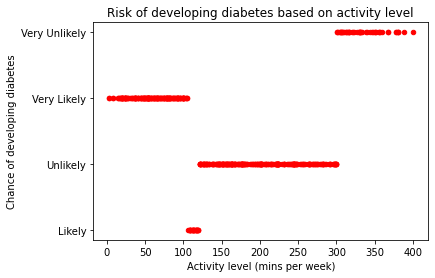

In [212]:
# https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

#  Visualisation of activity linked risk

df_actlvl.plot(kind="scatter", x="Activity level (mins per week)", y="Chance of developing diabetes", color="red", title="Risk of developing diabetes based on activity level")

plt.show()

# To fix order of y axis

## Age

It is known that Type 2 diabetes is more common in older adults, however with the rise of childhood obesity, more children are being diagnosed with type 2 diabetes, but for the project, only adults will be considered. 

As people get older,their risk of developing type 2 diabetes increases, this could be due to increased insulin resistance which in cause their blood glucose levels to rise. According to a study which looks at the the relationship between age and diabetes, it was found that there is a higher risk of diabetes in the older population. Over 40% of people who are 65 years old and older meet the criteria to be considered diabetic (Chang and Halter, 2003). 

According to the Central Statistics Office, in 2016, the mean age of the population was 37.4, the distribution of the Irish population by age group is as follows;
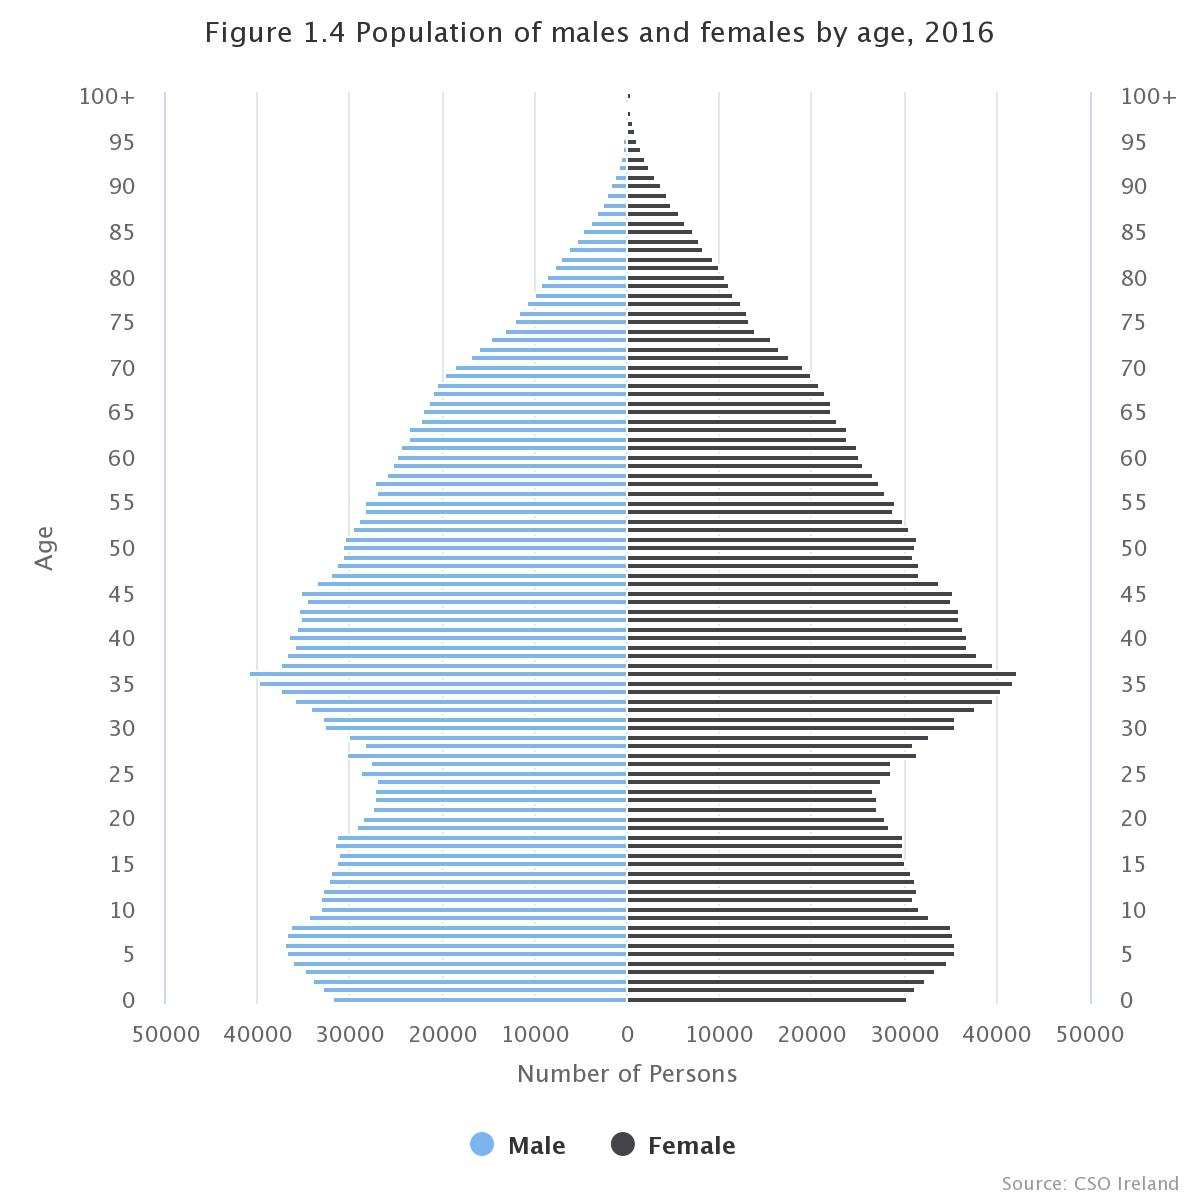

I used the poisson distribution to mirror the real-life age distribution of Ireland's population.

In [213]:
# https://docs.python.org/3/library/random.html

np.random.seed(1) 

# Random 500 ages between 18-75 inclusive using the poisson distribution.
age = np.random.poisson(37.5,size=(500)).round()

print(age)
df_age = pd.DataFrame(age, columns=["Age"])

df_age

[36 30 31 36 36 32 36 30 34 27 31 28 53 41 41 33 28 47 33 32 37 39 39 28
 41 24 40 50 47 30 36 49 42 46 42 33 36 40 37 36 47 34 46 47 31 49 26 41
 45 38 29 39 43 44 45 38 25 23 32 39 39 33 31 32 40 30 26 39 39 38 41 26
 40 42 33 31 38 33 42 51 48 35 39 48 36 31 30 44 31 35 39 37 43 37 36 34
 39 43 24 39 39 33 42 42 45 41 35 36 40 31 35 40 33 38 39 38 39 35 35 41
 30 35 39 33 31 42 33 36 32 38 30 38 30 32 43 34 45 28 41 43 43 33 40 43
 34 47 38 35 30 45 41 36 33 42 25 32 34 39 35 38 37 32 27 29 43 43 45 44
 30 37 36 37 37 43 47 43 40 38 30 31 41 47 33 29 30 44 38 47 36 50 34 38
 37 33 39 38 36 35 49 48 27 34 39 44 41 39 25 40 38 44 39 28 37 44 41 37
 37 30 42 34 42 29 38 43 44 41 37 40 37 44 41 33 41 45 42 43 44 32 34 42
 32 30 41 27 32 41 34 36 41 30 36 30 31 42 39 40 34 50 43 44 36 35 37 32
 38 35 43 39 43 38 30 32 42 45 45 36 33 49 42 41 35 42 36 47 29 34 38 30
 40 37 44 35 32 34 46 43 40 36 39 38 45 38 45 41 51 44 45 33 37 37 36 36
 34 30 42 43 43 43 40 34 36 36 40 45 33 36 34 33 34

,Age
0,36
1,30
2,31
3,36
4,36
...,...
495,35
496,40
497,44
498,52


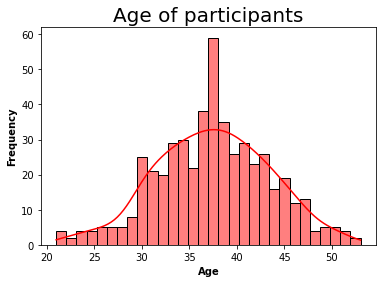

In [214]:
# https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/?ref=lbp
# Create a histogram using seaborn.
import seaborn as sns

sns.histplot(age, bins=30, color='red', kde= True) # Bins are the number of bars on the plot

# Adding labels to axis and title of plot.
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Age of participants', fontsize = 20)

plt.show()

## Alcohol Consumption

Excessive alcohol consumption contributes to unstable blood glucose levels as alcohol is broken down in the liver rather than to help regulate blood sugar levels. In 2019, it was found that alcohol consumption per capita was 14.5 litres of alcohol. Only 20.6% of the population abstain from alcohol completely (O'Dwyer et al, 2021). 


Alcohol consumption varies amongst different age groups, there is no breakdown on the ages of people in the 20.6% of population who doesn't drink, for the sake of this project, I will use the random choice function.

In [215]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
np.random.seed(1)

# Randomly generate 500 yes/ no answers, taking in account that a fifth of the population don't consume alcohol.
Alcohol = np.random.choice (["Yes", "No"], size =500, p= [0.794,0.206])

# https://dfrieds.com/data-analysis/value-counts-python-pandas.html
# create dataframe on yes/no output and count occurences of each answer.
df_al = pd.DataFrame(Alcohol, columns= ["Alcohol Consumption"])
             
df_al

,Alcohol Consumption
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
495,No
496,No
497,No
498,No


In [216]:
# Count the occurences of answers
df_al ["Alcohol Consumption"].value_counts()  

Yes    383
No     117
Name: Alcohol Consumption, dtype: int64

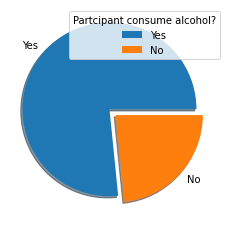

In [217]:
# https://www.w3schools.com/python/matplotlib_pie_charts.asp
# Create a pie chart using the information above.
y = np.array([383,117])

# As the occurences of yes/nos are quite similar, I've added shadows to the pie chart to make each answer stand out.
mylabels = ["Yes", "No"]                 # labels
myexplode = [.1,0]                       # indicates how far away from the centre of pie chart each wedge from centre of pie
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)  
plt.legend(title = "Partcipant consume alcohol?")  # add key with title
plt.show() 

In [218]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html
np.random.seed(1)

# triangular distribution
BMI = np.random.triangular(18.5,25.8,35,500).round()
print (BMI)

df_BMI = pd.DataFrame(BMI, columns=["BMI"])
df_BMI

[26. 28. 19. 25. 23. 22. 23. 25. 25. 27. 26. 28. 23. 31. 20. 28. 26. 27.
 23. 23. 30. 33. 25. 28. 31. 31. 22. 21. 23. 31. 22. 26. 32. 27. 28. 25.
 28. 30. 20. 29. 34. 29. 24. 29. 22. 26. 31. 24. 24. 22. 20. 28. 24. 24.
 26. 21. 27. 23. 27. 28. 22. 26. 28. 26. 21. 27. 28. 26. 32. 27. 31. 23.
 23. 30. 25. 23. 32. 25. 29. 29. 31. 27. 29. 25. 24. 31. 26. 33. 28. 27.
 22. 32. 26. 27. 26. 24. 31. 27. 19. 27. 25. 27. 31. 25. 31. 27. 20. 32.
 28. 34. 23. 23. 32. 28. 21. 29. 29. 32. 28. 22. 20. 20. 20. 24. 30. 27.
 27. 30. 22. 24. 27. 33. 27. 20. 29. 24. 30. 25. 30. 29. 27. 23. 21. 22.
 21. 22. 24. 28. 27. 20. 21. 33. 27. 23. 24. 29. 23. 27. 33. 30. 24. 26.
 27. 30. 23. 20. 21. 26. 27. 27. 25. 34. 27. 25. 27. 29. 28. 24. 21. 25.
 28. 24. 29. 21. 24. 30. 23. 28. 27. 32. 24. 21. 29. 29. 31. 32. 20. 24.
 27. 32. 32. 27. 31. 28. 25. 26. 27. 27. 32. 31. 25. 33. 23. 22. 23. 26.
 20. 32. 30. 20. 23. 25. 22. 30. 25. 32. 27. 31. 30. 31. 26. 27. 29. 24.
 26. 27. 20. 27. 26. 30. 25. 31. 27. 23. 29. 27. 21

,BMI
0,26.0
1,28.0
2,19.0
3,25.0
4,23.0
...,...
495,32.0
496,32.0
497,30.0
498,32.0


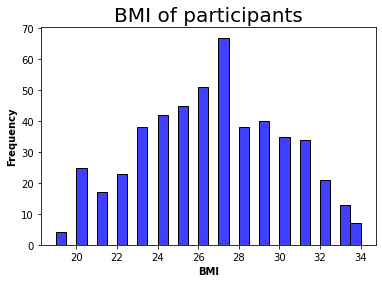

In [219]:
# Seaborn to create histogram
sns.histplot(BMI, bins=30, color='blue')

plt.xlabel('BMI', fontweight = 'bold')

plt.ylabel('Frequency', fontweight = 'bold')

plt.title('BMI of participants', fontsize = 20)

plt.show ()

In [220]:
# Assigning status to the BMI values above

# List of conditions for the BMI
conditions = [
    (df_BMI["BMI"] <= 18.5),
    (df_BMI["BMI"] > 18.5) & (df_BMI["BMI"]  <= 24.9),
    (df_BMI["BMI"] > 24.9) & (df_BMI["BMI"] <= 29.9),
    (df_BMI["BMI"] > 29.9)
    ]

values = ["Underweight", "Healthy", "Pre-Obesity", "Obese"]

# Add column to the df with a heading
df_BMI["Status"] = np.select(conditions, values)


df_BMI

,BMI,Status
0,26.0,Pre-Obesity
1,28.0,Pre-Obesity
2,19.0,Healthy
3,25.0,Pre-Obesity
4,23.0,Healthy
...,...,...
495,32.0,Obese
496,32.0,Obese
497,30.0,Obese
498,32.0,Obese


Merging all the randomly generated data to a single data frame 


In [221]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat
# Emalgamating all the variables dataframes into one
df_diabetes = pd.concat([df_actlvl, df_age, df_al, df_BMI], axis=1) 
df_diabetes
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# Dropping the two columns from prev dataframes.
df_diabetes.drop (columns= ["Chance of developing diabetes","Status"])


# need to find way to organise/fix code/distributions, more act lvl should not = higher BMI

,Activity level (mins per week),Age,Alcohol Consumption,BMI
0,118.0,36,Yes,26.0
1,211.0,30,Yes,28.0
2,2.0,31,Yes,19.0
3,90.0,36,Yes,25.0
4,55.0,36,Yes,23.0
...,...,...,...,...
495,317.0,35,No,32.0
496,321.0,40,No,32.0
497,264.0,44,No,30.0
498,308.0,52,No,32.0


# Relationship between variables

## BMI vs activity level

Sedimentary individuals tend to have a higher BMI.

<AxesSubplot:xlabel='BMI', ylabel='Activity level (mins per week)'>

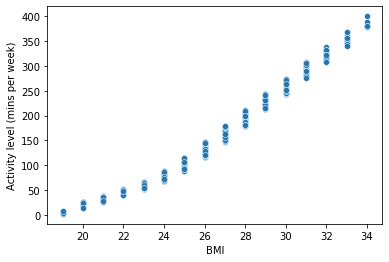

In [222]:
x = BMI
y = activity_level

sns.scatterplot(data=df_diabetes, x="BMI",y="Activity level (mins per week)")

#edit as there should be a correlation but negativly

## Age vs BMI

Research has associated higher BMI with older age, this could be the cause of changing body compositions, as we get older, our muscle mass decreases and fat tisse increases.Coupled with inactivity, this could put an older person in high risk of diabetes.

<AxesSubplot:xlabel='Age', ylabel='BMI'>

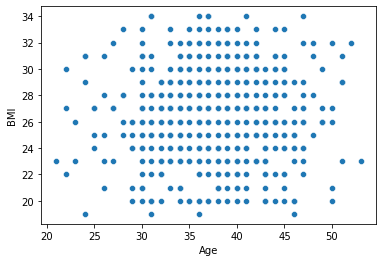

In [223]:
# Comparing age vs BMI
x = age 
y = BMI

sns.scatterplot(data=df_diabetes, x="Age",y="BMI")

In [224]:
# BMI by age group

# References

https://www.bhf.org.uk/informationsupport/heart-matters-magazine/medical/tests/blood-sugar

https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations
https://towardsdatascience.com/jupyter-and-markdown-cbc1f0ea6406

https://ncdrisc.org/data-downloads-adiposity.html (BMI)
Worldwide trends in body-mass index, underweight, overweight, and obesity from 1975 to 2016: a pooled analysis of 2416 population-based measurement studies in 128.9 million children, adolescents, and adults. Lancet 2017, 390:2627-2642

Chang, A.M. and Halter, J.B. (2003) “Aging and insulin secretion,” American Journal of Physiology-Endocrinology and Metabolism, 284(1). Available at: https://doi.org/10.1152/ajpendo.00366.2002. 

Adilson Marques, Miguel Peralta, Ana Naia, Nuno Loureiro, Margarida Gaspar de Matos, Prevalence of adult overweight and obesity in 20 European countries, 2014, European Journal of Public Health, Volume 28, Issue 2, April 2018, Pages 295–300, https://doi.org/10.1093/eurpub/ckx143

https://www.hrb.ie/fileadmin/2._Plugin_related_files/Publications/2021_publications/2021_HIE/Evidence_Centre/HRB_Alcohol_Overview_Series_11.pdf

http://apps.who.int/iris/bitstream/handle/10665/44399/9789241599979_eng.pdf?sequence=1 - activity WHO

https://www.ucd.ie/issda/t4media/Irish%20Sports%20Monitor%20Annual%20Report%202013.pdf

Worldwide trends in diabetes since 1980: a pooled analysis of 751 population-based studies with 4.4 million participants. Lancet 2016, 387:1513-1530
https://i-parc.ie/?p=603

https://www.researchsquare.com/article/rs-2068734/v1 - obesity and alco